## Voltage curve analysis

In [1]:
%aiida

Loaded AiiDA DB environment - profile name: scanlon-test.

In [21]:
import toolchest.phase_diagram as tpd 
import matplotlib.pyplot as plt
plt.style.use('/home/bonan/publication_mp_style')
from aiida_user_addons.vworkflows.voltage_curve import get_voltage_curve_obj

In [22]:
vol_work = load_node('dc973247-6f0d-43b4-b4ba-df42ce544d87')

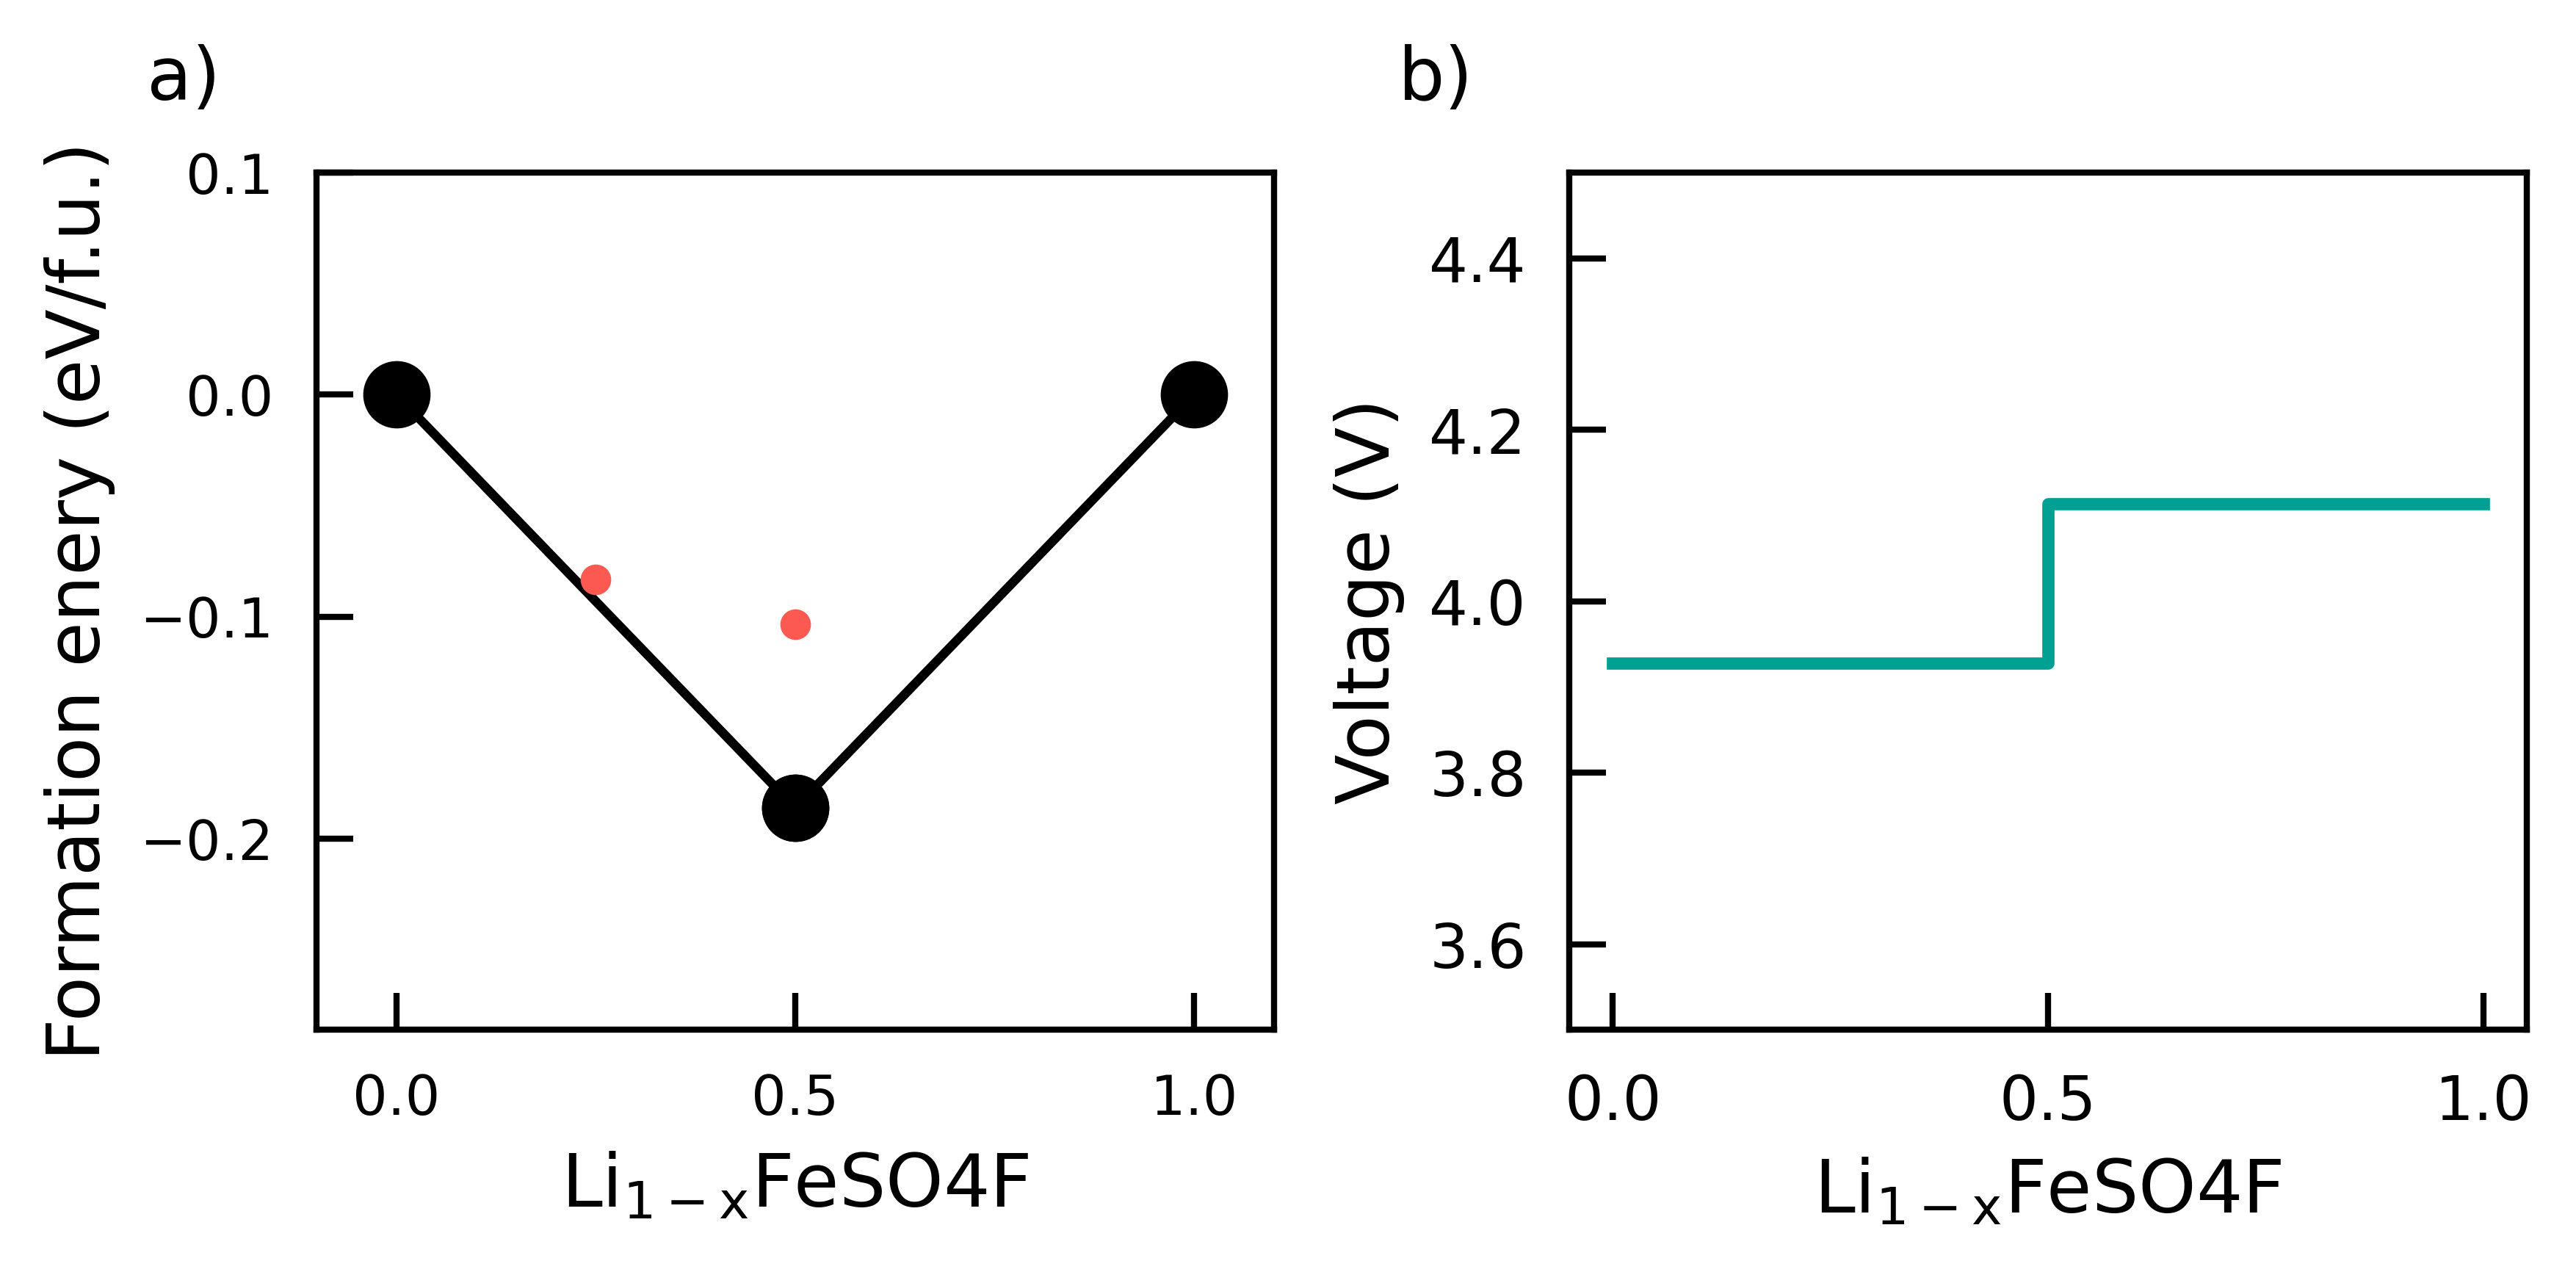

In [29]:
curve = get_voltage_curve_obj(vol_work)

fig, ax = plt.subplots(1, 2, figsize=(6, 3))

curve.plot_voltages(ax=ax[1])
ax[1].lines[0].set_linewidth(2)
ax[1].set_xlabel(r'$\mathrm{Li_{1-x}FeSO4F}$', fontsize=12)
plt.ylabel('Voltage (V)', fontsize=12)
plt.xticks(ticks=[0, 0.5, 1.0], fontsize=10)
plt.yticks(fontsize=10)


plt.sca(ax[0])
pdplotter = tpd.BetterMplPlotter(curve.phase_diagram, backend='matplotlib', markerfacecolor='k', markersize=10, 
                                 show_unstable=5.0)
pdplotter.get_plot(plt=plt, label_unstable=False, label_stable=False, energy_colormap=None, 
                   stable_label_size=12, no_polyanion=True)
ax[0].set_xlabel(r'$\mathrm{Li_{1-x}FeSO4F}$', fontsize=12)
plt.ylabel(r'Formation enery (eV/f.u.)', fontsize=12)

ticks = np.array([0.0,0.5, 1.0])
plt.xticks(ticks, labels=ticks)
plt.tight_layout()
ax[1].set_ylim(3.5, 4.5)

ax[0].text(-0.1, 1.15, 'a)', transform=ax[0].transAxes,
      fontsize=12, va='top', ha='right')

ax[1].text(-0.1, 1.15, 'b)', transform=ax[1].transAxes,
      fontsize=12, va='top', ha='right')

fig.tight_layout()
